# Lock-in Amplifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit

In [2]:
def linfit(x, a, b):
    return a*x + b

In [3]:
df11 = pd.read_excel('lock_in_data.xlsx', sheet_name='11')
df12 = pd.read_excel('lock_in_data.xlsx', sheet_name='12')
df2 = pd.read_excel('lock_in_data.xlsx', sheet_name='2')
df3 = pd.read_excel('lock_in_data.xlsx', sheet_name='3')

## Part 1

Slope of fitted straight line = 0.9952023809524997


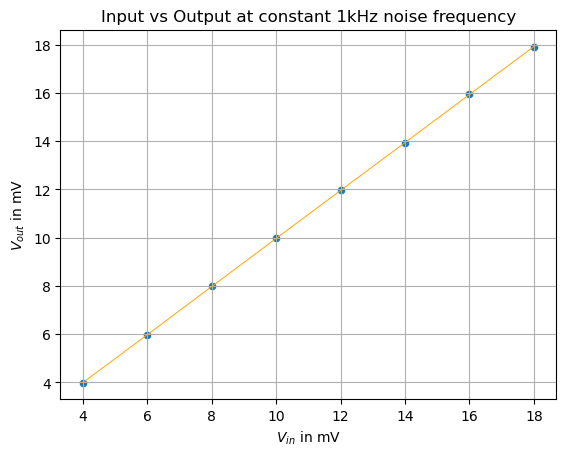

In [4]:
x1 = df11['Input'].to_numpy()
y1 = df11['Output'].to_numpy()
popt, pcov = curve_fit(linfit, x1, y1)
print(f'Slope of fitted straight line = {popt[0]}')
yf = linfit(x1, *popt)
sb.scatterplot(data=df11, x='Input', y='Output')
plt.plot(x1, y1, color='orange', lw=0.7)
plt.title('Input vs Output at constant 1kHz noise frequency')
plt.xlabel("$V_{in}$ in mV")
plt.ylabel("$V_{out}$ in mV")
plt.grid()
plt.savefig('plot11.png', dpi=150)
plt.show()

Slope of fitted straight line = 0.9947136363636248


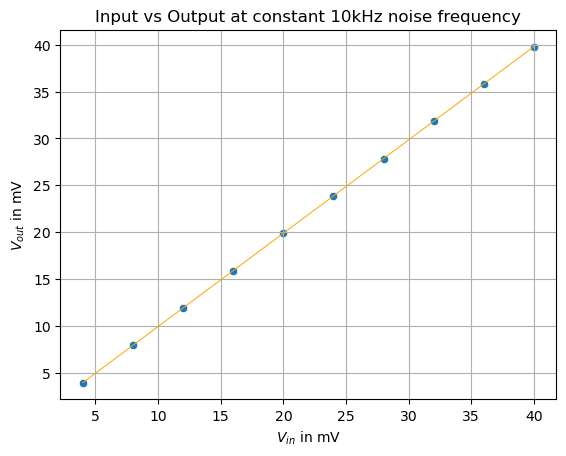

In [5]:
x1 = df12['Input'].to_numpy()
y1 = df12['Output'].to_numpy()
popt, pcov = curve_fit(linfit, x1, y1)
print(f'Slope of fitted straight line = {popt[0]}')
yf = linfit(x1, *popt)
sb.scatterplot(data=df12, x='Input', y='Output')
plt.plot(x1, yf, color='orange', lw=0.7)
plt.title('Input vs Output at constant 10kHz noise frequency')
plt.xlabel("$V_{in}$ in mV")
plt.ylabel("$V_{out}$ in mV")
plt.grid()
plt.savefig('plot12.png', dpi=150)
plt.show()

In [6]:
np.array([16.868, 17.039, 17.345, 17.725])*2.303

array([38.847004, 39.240817, 39.945535, 40.820675])

## Part 2

Slope of fitted straight line for 20mV input = -6.071428789544697e-05
Slope of fitted straight line for 30mV input = -0.00010000000218135519
Slope of fitted straight line for 40mV input = -9.999999999997057e-05


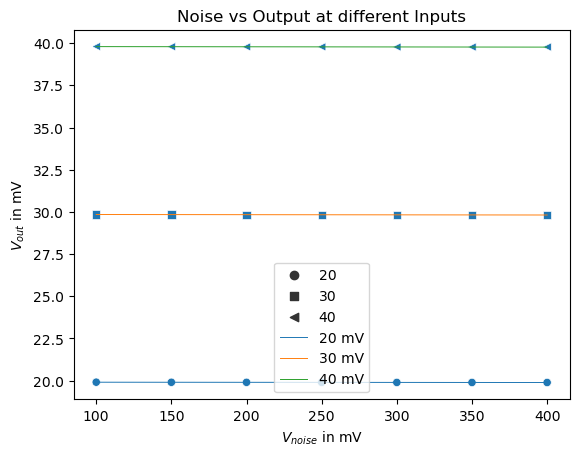

In [7]:
sb.scatterplot(data=df2, x='VN', y='Output', style='Input', 
               markers={20:'o',30:'s',40:'<'})
df2p = df2[df2['Input'] == 20]
x1 = df2p['VN'].to_numpy()
y1 = df2p['Output'].to_numpy()
popt, pcov = curve_fit(linfit, x1, y1)
print(f'Slope of fitted straight line for 20mV input = {popt[0]}')
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, label='20 mV')
df2p = df2[df2['Input'] == 30]
x1 = df2p['VN'].to_numpy()
y1 = df2p['Output'].to_numpy()
popt, pcov = curve_fit(linfit, x1, y1)
print(f'Slope of fitted straight line for 30mV input = {popt[0]}')
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, label='30 mV')
df2p = df2[df2['Input'] == 40]
x1 = df2p['VN'].to_numpy()
y1 = df2p['Output'].to_numpy()
popt, pcov = curve_fit(linfit, x1, y1)
print(f'Slope of fitted straight line for 40mV input = {popt[0]}')
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, label='40 mV')

plt.title('Noise vs Output at different Inputs')
plt.xlabel("$V_{noise}$ in mV")
plt.ylabel("$V_{out}$ in mV")
plt.legend(loc='best')
# plt.grid()
plt.savefig('plot2.png', dpi=150)
plt.show()

## Part 3

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


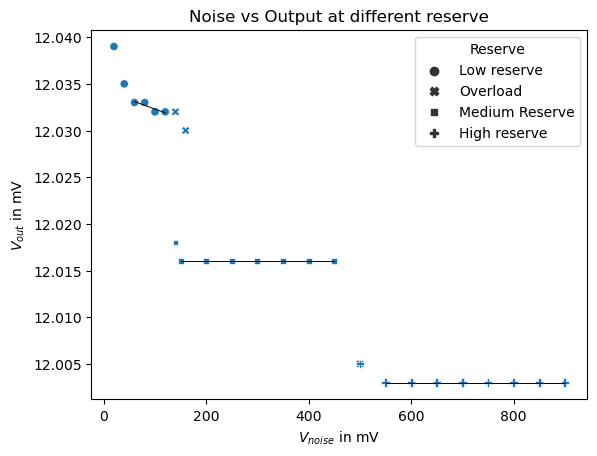

In [8]:
sb.scatterplot(data=df3, x='VN', y='Output', style='Reserve')
df3p = df3[df3['Reserve'] == 'Low reserve']
x1 = df3p['VN'].to_numpy()[2:]
y1 = df3p['Output'].to_numpy()[2:]
popt, pcov = curve_fit(linfit, x1, y1)
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, color='black')
df3p = df3[df3['Reserve'] == 'Medium Reserve']
x1 = df3p['VN'].to_numpy()[1:]
y1 = df3p['Output'].to_numpy()[1:]
popt, pcov = curve_fit(linfit, x1, y1)
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, color='black')
df3p = df3[df3['Reserve'] == 'High reserve']
x1 = df3p['VN'].to_numpy()[1:]
y1 = df3p['Output'].to_numpy()[1:]
popt, pcov = curve_fit(linfit, x1, y1)
yf = linfit(x1, *popt)
plt.plot(x1, yf, lw=0.7, color='black')
plt.title('Noise vs Output at different reserve')
plt.xlabel("$V_{noise}$ in mV")
plt.ylabel("$V_{out}$ in mV")
plt.savefig('plot3.png', dpi=150)
plt.show()